<a href="https://colab.research.google.com/github/SSJorge01/CHECKPOINT01_SEM02---SERS/blob/main/SERS_CP1_2SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings('ignore')

1. Carregue o dataset e exiba as 10 primeiras linhas.

In [38]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)

df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

In [39]:
# Essas duas variáveis representam diferentes tipos de potência,
# a Global_active_power é a energia que você usa para ligar suas luzes
# e aparelhos (medida em quilowatts [kW]), enquanto a Global_reactive_power
# é a energia "extra" que alguns equipamentos precisam para funcionar,
# mas que não se transforma em trabalho útil (medida em quilovolt-ampères reativos [kVAr].).

3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [40]:
df1 = df.drop(columns=['Date', 'Time'])
df1 = df1.apply(pd.to_numeric, errors='coerce')
df1 = df1.merge(df[['Date', 'Time']], left_index=True, right_index=True)
cols = ['Date', 'Time'] + [col for col in df1.columns if col not in ['Date', 'Time']]
df1 = df1[cols]

print(df1.isnull().sum())

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.

In [41]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce', dayfirst=True)
df1['Day_of_Week'] = df1['Date'].dt.dayofweek

5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

In [42]:
df1_2007 = df1[df1['Date'].dt.year == 2007]
media_consumo_diario_2007 = df1_2007.groupby('Date')['Global_active_power'].mean()

display(media_consumo_diario_2007)

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-12-27,1.758471
2007-12-28,2.161842
2007-12-29,2.290942


6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

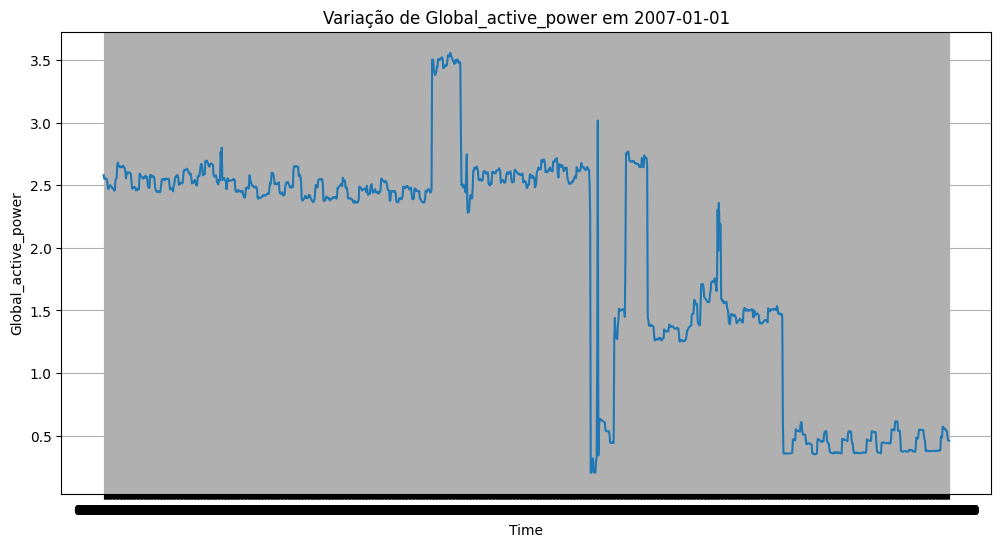

In [43]:
dia_escolhido = '2007-01-01'
df1_dia_escolhido = df1[df1['Date'] == dia_escolhido]

plt.figure(figsize=(12, 6))
plt.plot(df1_dia_escolhido['Time'], df1_dia_escolhido['Global_active_power'])
plt.title(f'Variação de Global_active_power em {dia_escolhido}')
plt.xlabel('Time')
plt.ylabel('Global_active_power')
plt.grid(True)
plt.show()

7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?



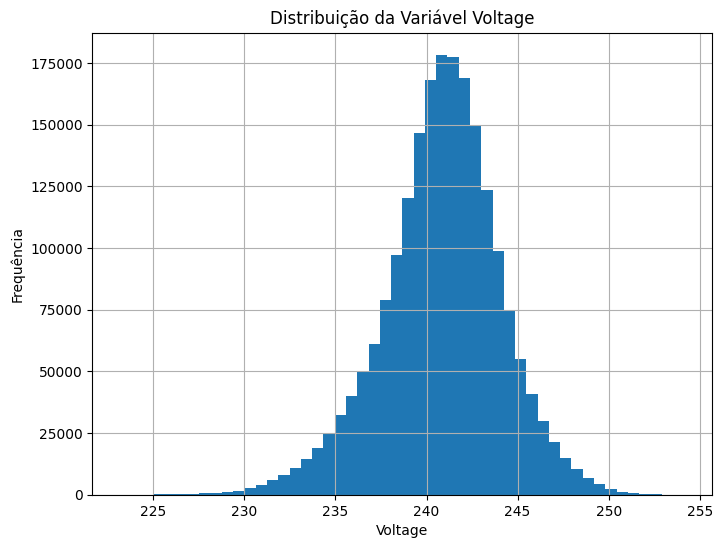

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(df1['Voltage'].dropna(), bins=50)
plt.title('Distribuição da Variável Voltage')
plt.xlabel('Voltage')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Pode ser observado que o histograma possui distribuição normal,
# em que a maioria dos dados se agrupa em torno da média, com a frequência
# diminuindo gradualmente à medida que nos afastamos desse valor central.
# Isso indica que a tensão na rede elétrica se mantém relativamente estável
# na maior parte do tempo, com menos ocorrências de valores extremos.

8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [45]:
consumo_medio_por_mes = df1.groupby(df1['Date'].dt.month)['Global_active_power'].mean()

display(consumo_medio_por_mes)

,Global_active_power
Date,
1,1.462226
2,1.300431
3,1.231343
4,1.047146
5,1.029571
6,0.909148
7,0.700359
8,0.572812
9,0.975653


9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [46]:
dia_maior_consumo = df1.loc[df1['Global_active_power'].idxmax()]['Date']

print(dia_maior_consumo)

2009-02-22 00:00:00


10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana

In [47]:
df1['Dia_da_Semana'] = df1['Date'].dt.weekday
df1['Fim_de_Semana'] = df1['Dia_da_Semana'].isin([5, 6])

consumo_medio = df1.groupby('Fim_de_Semana')['Global_active_power'].mean()
consumo_medio.index = consumo_medio.index.map({False: "Dias de semana", True: "Finais de semana"})

display(consumo_medio)

# O consumo médio é, por volta de, 20% maior durante os finais de semana em relação com os dias úteis.

,Global_active_power
Fim_de_Semana,
Dias de semana,1.035472
Finais de semana,1.234232


11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [48]:
correlacao = df1[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()

display(correlacao)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.

In [49]:
df1['Total_Sub_metering'] = df1['Sub_metering_1'] + df1['Sub_metering_2'] + df1['Sub_metering_3']

13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [50]:
media_global_active_power = df1['Global_active_power'].mean()

condicao = df1['Total_Sub_metering'] > media_global_active_power

df1_acima_media = df1[condicao]
meses_acima_media = df1_acima_media['Date'].dt.month.unique()

display(meses_acima_media)

# Total_Sub_metering ultrapassa a média de Global_active_power em todos os meses do ano.

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

14. Faça um gráfico de série temporal do Voltage para o ano de 2008.

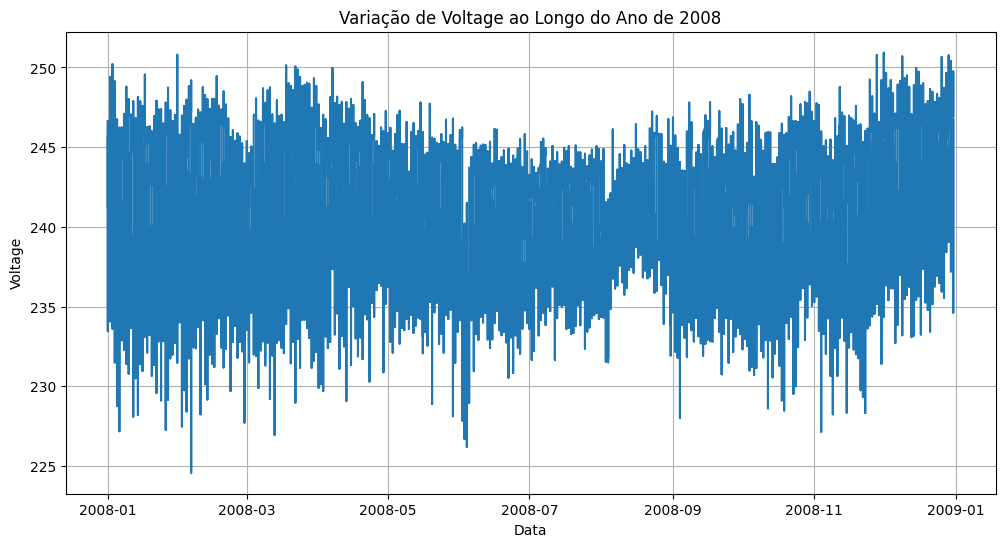

In [51]:
df1_2008 = df1[df1['Date'].dt.year == 2008]

plt.figure(figsize=(12, 6))
plt.plot(df1_2008['Date'], df1_2008['Voltage'])
plt.title('Variação de Voltage ao Longo do Ano de 2008')
plt.xlabel('Data')
plt.ylabel('Voltage')
plt.grid(True)
plt.show()

15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [52]:
verao_meses = [6, 7, 8]
inverno_meses = [12, 1, 2]

consumo_verao = df1[df1['Date'].dt.month.isin(verao_meses)]['Global_active_power'].mean()
consumo_inverno = df1[df1['Date'].dt.month.isin(inverno_meses)]['Global_active_power'].mean()

print(f'Consumo médio no verão (Hemisfério Norte): {consumo_verao:.2f}')
print(f'Consumo médio no inverno (Hemisfério Norte): {consumo_inverno:.2f}')

# O consumo médio durante o inverno no hemisfério norte é duas vezes o consumo
# médio durante o verão, provavelmente devido a necessidade de aquecimento
# durante as temperaturas congelantes que podem ocorrer no hemisfério norte.

Consumo médio no verão (Hemisfério Norte): 0.73
Consumo médio no inverno (Hemisfério Norte): 1.42


16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.


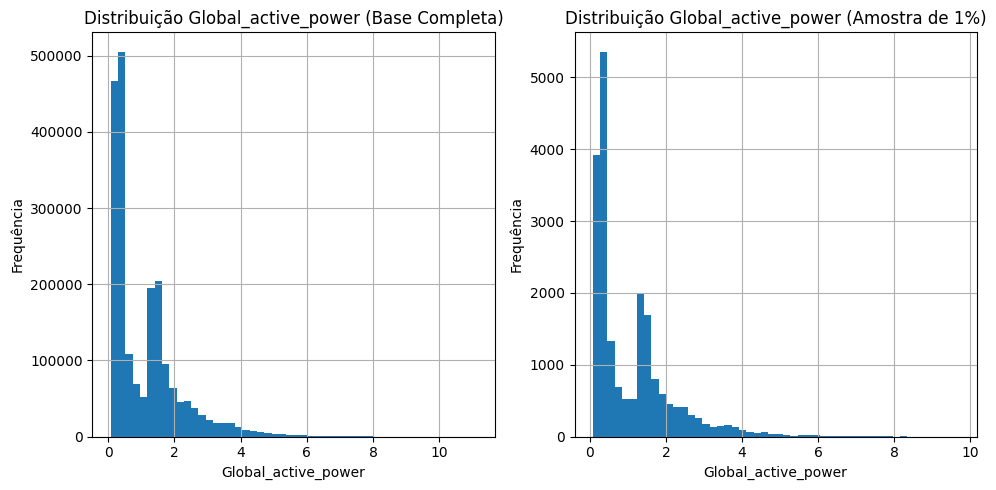

In [53]:
amostra = df1.sample(frac=0.01)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df1['Global_active_power'].hist(bins=50)
plt.title('Distribuição Global_active_power (Base Completa)')
plt.xlabel('Global_active_power')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
amostra['Global_active_power'].hist(bins=50)
plt.title('Distribuição Global_active_power (Amostra de 1%)')
plt.xlabel('Global_active_power')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# A distribuição de Global_acitve_power na amostragem aleatória
# de 1% dos dados é extremamente semelhante à da base completa.

17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

In [54]:
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Day_of_Week', 'Dia_da_Semana', 'Fim_de_Semana']]

scaler = MinMaxScaler()

df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

display(df1.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week,Dia_da_Semana,Fim_de_Semana,Total_Sub_metering
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,5,5,True,0.134328
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,5,5,True,0.126866
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,5,5,True,0.141791
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,5,5,True,0.134328
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,5,5,True,0.134328


18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.


In [55]:
df_clustering = df1[numerical_cols].dropna()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clustering['Cluster'] = kmeans.fit_predict(df_clustering)

df1 = df1.drop(columns=[col for col in df1.columns if 'Cluster' in col])

df1 = df1.merge(df_clustering['Cluster'], left_index=True, right_index=True, how='left')

print("Valores médios por cluster:")
display(df_clustering.groupby('Cluster').mean())

# Através dos valores médios de cada cluster é possivel interpretar os resultados da seguinte maneira:

# Cluster 0: Este cluster representa períodos com o maior consumo de energia, possuindo os maiores valores médios para
# Global_active_power, Global_reactive_power, Global_intensity, Sub_metering_1, Sub_metering_2 e Total_Sub_metering.
# a variável Voltage é menor em média neste cluster. Isso provavelmente corresponde a picos de uso quando vários
# aparelhos de alta potência estão em uso.

# Cluster 1: Este cluster apresenta consumo de energia moderado, com valores médios mais altos para as variáveis ​​de potência
# e intensidade em comparação com o cluster 2, mas menores que o cluster 0. Os valores de Sub_metering_3 são notavelmente
# maiores neste cluster. Isso pode representar períodos com alguns aparelhos funcionando, talvez durante o dia ou à noite.

# Cluster 2: Este cluster parece representar períodos de consumo de energia muito baixo, visto que os valores médios para
# Global_active_power, Global_reactive_power, Global_intensity e todas as variáveis ​​de Sub_metering são os mais baixos
# entre os três cluster. A variável Voltage é ligeiramente mais alta, em média, neste cluster. Isso pode representar períodos
# em que a maioria dos aparelhos está desligada ou em modo de espera.

Valores médios por cluster:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
Cluster,,,,,,,,
0,0.360432,0.142772,0.449768,0.352644,0.250085,0.211178,0.379279,0.378055
1,0.155669,0.094755,0.537270,0.151362,0.002285,0.006697,0.576895,0.138960
2,0.041138,0.082305,0.594748,0.043702,0.000964,0.007017,0.013326,0.007906


19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

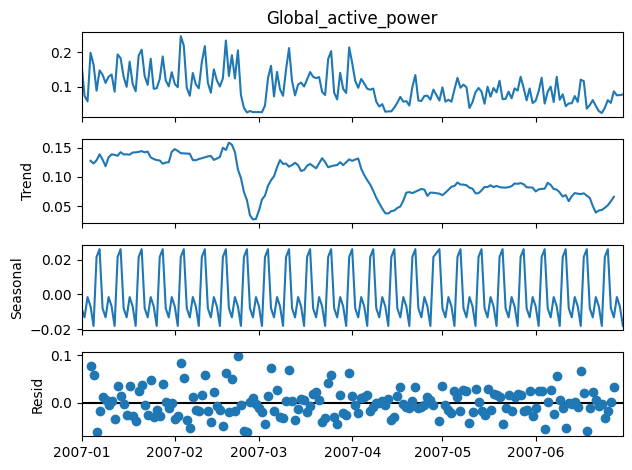

In [56]:
df_6_meses = df1.set_index('Date').loc['2007-01-01':'2007-06-30']

df_diario = df_6_meses['Global_active_power'].resample('D').mean().dropna()

decomposicao = seasonal_decompose(df_diario, model='additive', period=7)

fig = decomposicao.plot()
plt.show()

20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.

Erro absoluto médio (MAE): 0.00308
Erro médio quadrático (MSE): 0.00002
Coeficiente de determinação (R²): 0.99782
Coeficiente (inclinação): 1.03691
Intercepto: -0.00331


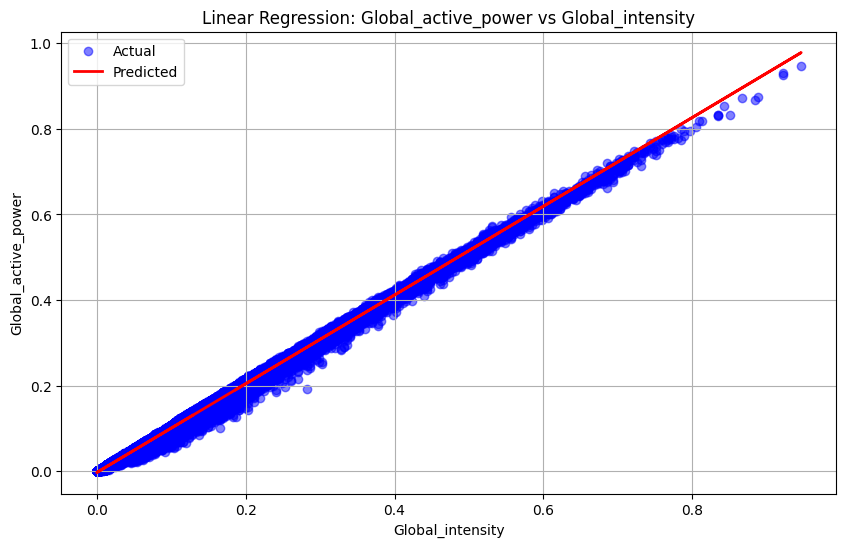

In [57]:
X = df1[['Global_intensity']].dropna()
y = df1['Global_active_power'].dropna()

df_regression = df1[['Global_intensity', 'Global_active_power']].dropna()
X = df_regression[['Global_intensity']]
y = df_regression['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro absoluto médio (MAE): {mae:.5f}')
print(f'Erro médio quadrático (MSE): {mse:.5f}')
print(f'Coeficiente de determinação (R²): {r2:.5f}')
print(f'Coeficiente (inclinação): {model.coef_[0]:.5f}')
print(f'Intercepto: {model.intercept_:.5f}')

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Global_active_power vs Global_intensity')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.legend()
plt.grid(True)
plt.show()

# Através dos valores obtidos é possível concluir que o modelo está extremamente
# bem ajustado (quase relação linear perfeita), com erro médio praticamente nulo
# e com poder explicativo muito alto (R² ≈ 1). Isso mostra que Global_acitve_power
# é praticamente uma função linear de Global_intensity — o que pode até indicar
# que uma variável foi derivada da outra nos dados originais (algo comum em datasets
# de energia elétrica).

21. Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.

In [58]:
df1['Datetime'] = pd.to_datetime(df1['Date'].astype(str) + ' ' + df1['Time'])
df1 = df1.set_index('Datetime')

df_hora = df1['Global_active_power'].resample('h').mean()

consumo_medio_por_hora = df_hora.groupby(df_hora.index.time).mean()
top_horarios_maior_consumo = consumo_medio_por_hora.sort_values(ascending=False).head()

print("Horários com maior consumo médio:")
display(top_horarios_maior_consumo)

Horários com maior consumo médio:


,Global_active_power
20:00:00,0.165044
21:00:00,0.162961
19:00:00,0.150048
07:00:00,0.129130
08:00:00,0.125379


22. Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

In [59]:
autocorr_1h = acf(df_hora.dropna(), nlags=1)[1]
autocorr_24h = acf(df_hora.dropna(), nlags=24)[24]
autocorr_48h = acf(df_hora.dropna(), nlags=48)[48]

print(f'Autocorrelação (Lag 1h): {autocorr_1h:.4f}')
print(f'Autocorrelação (Lag 24h): {autocorr_24h:.4f}')
print(f'Autocorrelação (Lag 48h): {autocorr_48h:.4f}')

# Sim, existem padrões repetidos diariamente. A autocorrelação de 24h indica
# que há uma correlação significativa entre os valores de consumo com um
# intervalo de 24 horas, o que sugere a presença de padrões diários no consumo
# de energia elétrica. A autocorrelação de 48h também é considerável, reforçando
# a ideia de repetição de comportamento a cada dois dias. Além disso, o valor
# ainda mais alto para o lag de 1h mostra que o consumo tem uma forte
# dependência com o valor da hora anterior, o que é comum em séries temporais
# com comportamento contínuo.

Autocorrelação (Lag 1h): 0.7132
Autocorrelação (Lag 24h): 0.4346
Autocorrelação (Lag 48h): 0.3981


23. Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.

In [60]:
df_pca = df1[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].dropna()

pca = PCA(n_components=2)
df_pca_reduced = pca.fit_transform(df_pca)

df_pca_reduced = pd.DataFrame(df_pca_reduced, columns=['PC1', 'PC2'])

print("Variância explicada por cada componente:")
display(pca.explained_variance_ratio_)

Variância explicada por cada componente:


array([0.60857094, 0.22433556])

24. Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

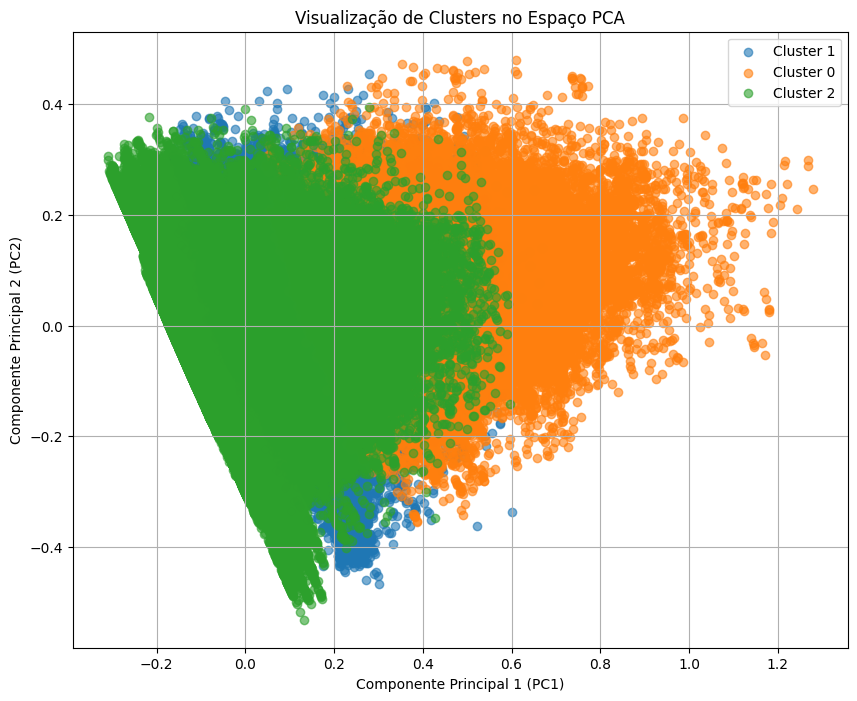

In [61]:
df_pca_reduced['Cluster'] = df_clustering['Cluster'].values

plt.figure(figsize=(10, 8))
for cluster in df_pca_reduced['Cluster'].unique():
    subset = df_pca_reduced[df_pca_reduced['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Visualização de Clusters no Espaço PCA')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

# Analisando o gráfico, os clusters parecem se separar razoavelmente bem no espaço
# reduzido pelas duas componentes principais. O Cluster 2 (consumo baixo) forma
# um grupo mais distinto, enquanto os Clusters 0 (consumo alto) e 1 (consumo moderado)
# mostram alguma sobreposição, mas ainda assim apresentam centros e dispersões diferentes.
# Isso sugere que o PCA, mesmo reduzindo a dimensionalidade, capturou as principais
# variações nos dados que permitem a diferenciação dos grupos de consumo.

25. Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

RMSE (Regressão Linear): 0.08799
RMSE (Regressão Polinomial - Grau 2): 0.08758


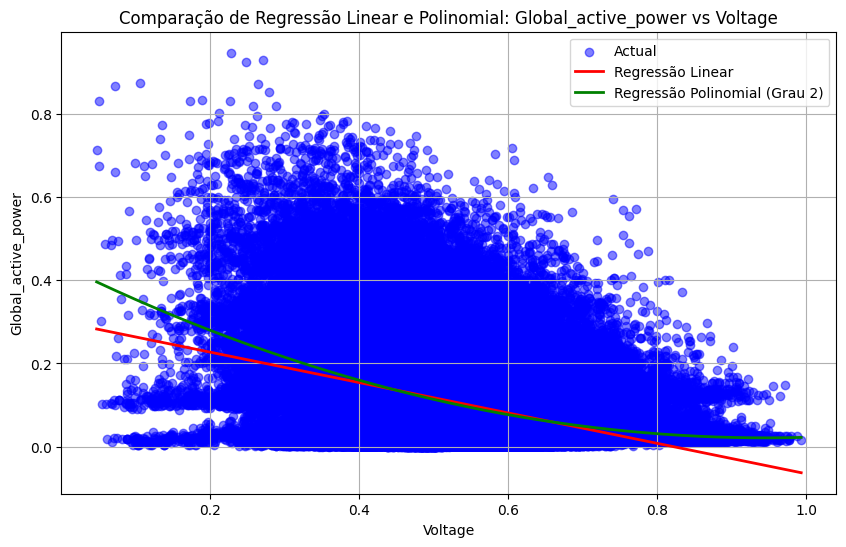

In [62]:
df_regression_voltage = df1[['Voltage', 'Global_active_power']].dropna()
X = df_regression_voltage[['Voltage']]
y = df_regression_voltage['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f'RMSE (Regressão Linear): {rmse_linear:.5f}')
print(f'RMSE (Regressão Polinomial - Grau 2): {rmse_poly:.5f}')

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)

X_test_sorted = np.sort(X_test.values, axis=0)
y_pred_linear_sorted = linear_model.predict(X_test_sorted)
X_test_poly_sorted = poly_features.transform(X_test_sorted)
y_pred_poly_sorted = poly_model.predict(X_test_poly_sorted)

plt.plot(X_test_sorted, y_pred_linear_sorted, color='red', linewidth=2, label='Regressão Linear')
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', linewidth=2, label='Regressão Polinomial (Grau 2)')

plt.title('Comparação de Regressão Linear e Polinomial: Global_active_power vs Voltage')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.legend()
plt.grid(True)
plt.show()

# Através da comparação dos modelos, é possível interpretar os resultados da seguinte maneira:

# Regressão Linear: O modelo linear apresentou um ajuste simples, representando a tendência
# geral entre Voltage e Global_active_power. O valor do RMSE foi 0.08799, mostrando
# desempenho razoável, mas sem capturar variações não lineares.

# Regressão Polinomial (Grau 2): O modelo polinomial conseguiu se ajustar ligeiramente melhor
# à dispersão dos dados, com RMSE de 0.08758. A curva resultante se adapta melhor à distribuição,
# principalmente em regiões onde a relação não é estritamente linear.

# Comparação: Embora a diferença entre os erros seja pequena, a regressão polinomial apresentou
# um desempenho superior. Isso sugere que a relação entre as variáveis não é totalmente linear,
# mas também indica que Voltage sozinho não explica bem o comportamento da potência ativa,
# havendo influência de outros fatores.